Duplikaty: 1
species
setosa        50
versicolor    50
virginica     50
dtype: int64


C:\Users\macie\AppData\Local\Temp\ipykernel_30084\1612607949.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby("species").size())


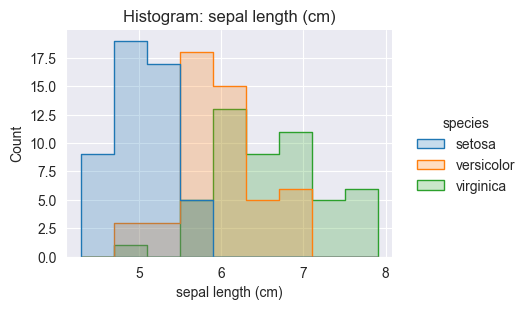

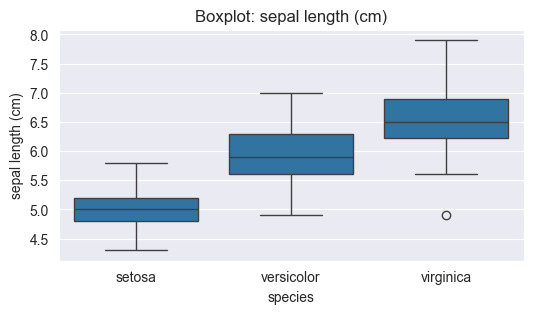

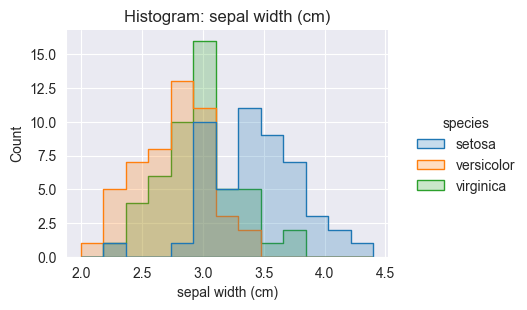

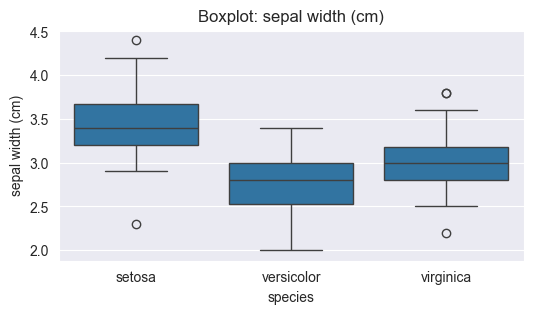

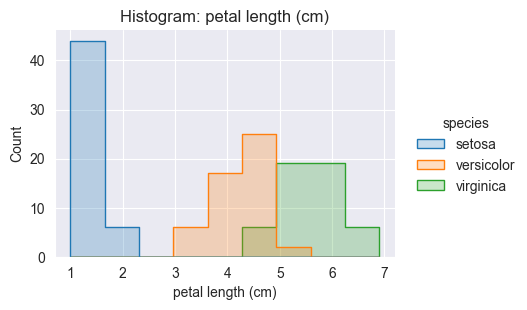

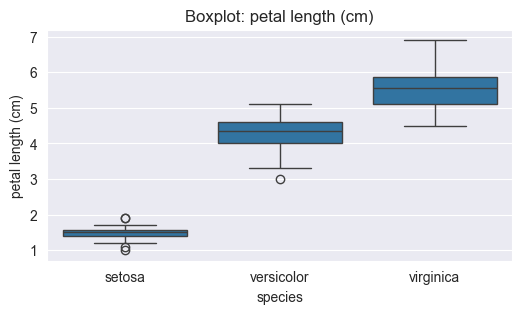

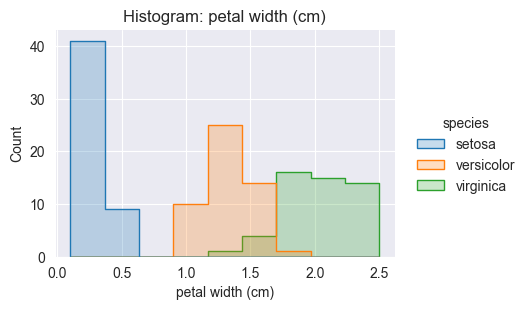

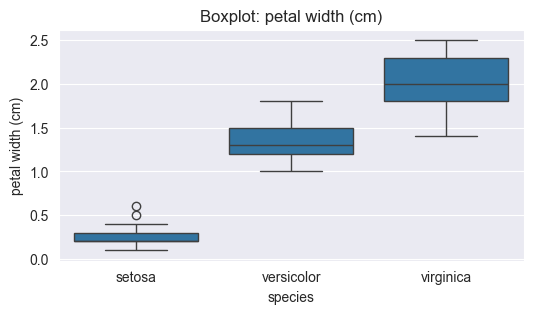

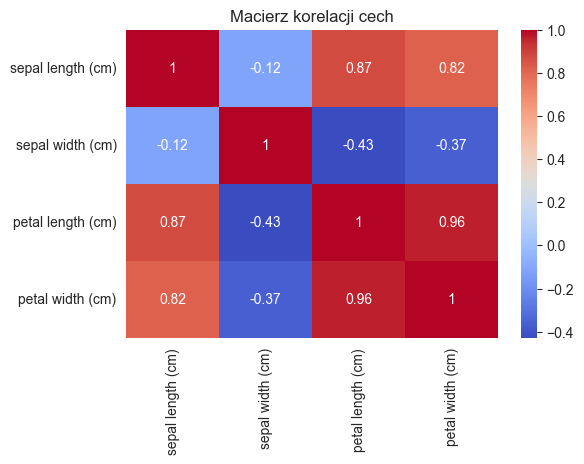

petal length (cm)     F=1180.16  p=2.86e-91
petal width (cm)      F= 960.01  p=4.17e-85
sepal length (cm)     F= 119.26  p=1.67e-31
sepal width (cm)      F=  49.16  p=4.49e-17


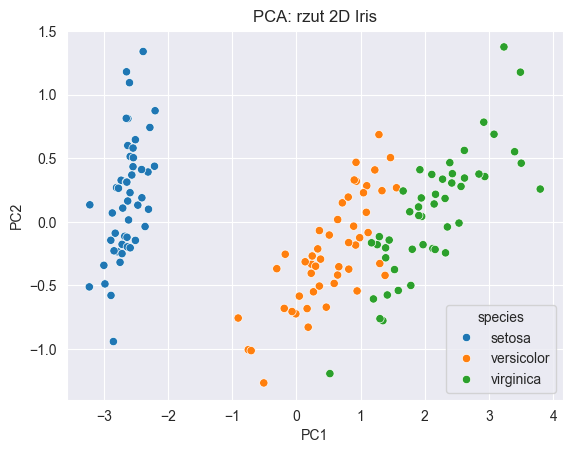

Explained variance ratio: [0.92461872 0.05306648]
Razem: 0.9776852063187963
Bez skalowania → mean=0.967, std=0.030
Ze skalowaniem → mean=0.973, std=0.025


In [5]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = pd.Categorical.from_codes(iris.target, iris.target_names)

print("Duplikaty:", df.duplicated().sum())
print(df.groupby("species").size())

import matplotlib.pyplot as plt
import seaborn as sns

features = df.columns[:-1]
for col in features:
    sns.displot(data=df, x=col, hue="species", kind="hist", height=3, aspect=1.4, element="step")
    plt.title(f"Histogram: {col}")
    plt.show()

    plt.figure(figsize=(6,3))
    sns.boxplot(data=df, x="species", y=col)
    plt.title(f"Boxplot: {col}")
    plt.show()

#korelacje
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="coolwarm")
plt.title("Macierz korelacji cech")
plt.show()

#kod - ANOVA (ranking cech)
from sklearn.feature_selection import f_classif

features = df.columns[:-1]
X = df[features].values
y = df["species"].cat.codes.values

F, p = f_classif(X, y)

rank = sorted(zip(features, F, p), key=lambda t: t[1], reverse=True)
for name, f, pv in rank:
    print(f"{name:20s}  F={f:7.2f}  p={pv:.2e}")

#2D projekcja PCA
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dane
features = df.columns[:-1]

# PCA
pca = PCA(n_components=2)
Z = pca.fit_transform(df[features])

# DataFrame do wykresu
tmp = pd.DataFrame(Z, columns=["PC1", "PC2"])
tmp["species"] = df["species"]

# Scatterplot
sns.scatterplot(data=tmp, x="PC1", y="PC2", hue="species")
plt.title("PCA: rzut 2D Iris")
plt.show()

# Ile wariancji tłumaczy każdy komponent?
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Razem:", pca.explained_variance_ratio_.sum())

#wpływ skalowania na KNN
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

# Dane
features = df.columns[:-1]
X = df[features].values
y = df["species"].cat.codes.values

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Model bez skalowania
model_raw = KNeighborsClassifier(n_neighbors=5)
scores_raw = cross_val_score(model_raw, X, y, cv=cv)

# Model ze skalowaniem
model_scaled = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
scores_scaled = cross_val_score(model_scaled, X, y, cv=cv)

print("Bez skalowania → mean=%.3f, std=%.3f" % (scores_raw.mean(), scores_raw.std()))
print("Ze skalowaniem → mean=%.3f, std=%.3f" % (scores_scaled.mean(), scores_scaled.std()))




